# New Section

In [2]:
!pip install tensorflow
!pip install pandas
!pip install matplotlib

     |████████████████████████████████| 394.3 MB 38 kB/s 
     |████████████████████████████████| 129 kB 20.3 MB/s 
     |████████████████████████████████| 65 kB 3.4 MB/s 
     |████████████████████████████████| 1.0 MB 20.8 MB/s 
     |████████████████████████████████| 14.8 MB 12.2 MB/s 
     |████████████████████████████████| 10.6 MB 15.9 MB/s 
     |████████████████████████████████| 2.9 MB 15.8 MB/s 
     |████████████████████████████████| 57 kB 4.3 MB/s 
     |████████████████████████████████| 3.8 MB 13.1 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 462 kB 23.8 MB/s 
     |████████████████████████████████| 97 kB 7.1 MB/s 
     |████████████████████████████████| 781 kB 6.8 MB/s 
     |████████████████████████████████| 298 kB 38.9 MB/s 
     |████████████████████████████████| 136 kB 28.0 MB/s 
     |████████████████████████████████| 155 kB 29.9 MB/s 
     |████████████████████████████████| 147 kB 31.0 MB/s 
     |███████████████

In [8]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.applications import xception

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [9]:
batch_size = 64
epochs = 5
IMG_HEIGHT = 150
IMG_WIDTH = 150
print(IMG_HEIGHT)

150


In [10]:
train_image_generator = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True,
    rotation_range=75,
    width_shift_range=0.1, height_shift_range=0.1,
    brightness_range = [0.8,1.2],
    zoom_range=0.1) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [11]:
dataset = pd.read_csv("train.csv")
dataset

,Id,Category
0,0000.png,08_EMPTY
1,0001.png,01_TUMOR
2,0002.png,08_EMPTY
3,0003.png,02_STROMA
4,0004.png,08_EMPTY
...,...,...
4495,4495.png,08_EMPTY
4496,4496.png,08_EMPTY
4497,4497.png,06_MUCOSA
4498,4498.png,04_LYMPHO


In [5]:
train = dataset.iloc[:4000].reset_index()
train

,index,Id,Category
0,0,0000.png,08_EMPTY
1,1,0000.png,08_EMPTY
2,2,0001.png,02_STROMA
3,3,0001.png,01_TUMOR
4,4,0002.png,08_EMPTY
...,...,...,...
3995,3995,3993.png,08_EMPTY
3996,3996,3994.png,05_DEBRIS
3997,3997,3995.png,08_EMPTY
3998,3998,3996.png,06_MUCOSA


In [6]:
val = dataset.iloc[4000:].reset_index()
val

,index,Id,Category
0,4000,3998.png,03_COMPLEX
1,4001,3999.png,02_STROMA
2,4002,4000.png,05_DEBRIS
3,4003,4001.png,05_DEBRIS
4,4004,4002.png,03_COMPLEX
...,...,...,...
497,4497,4495.png,08_EMPTY
498,4498,4496.png,08_EMPTY
499,4499,4497.png,06_MUCOSA
500,4500,4498.png,04_LYMPHO


In [7]:
train_dir = 'train/train'
new_train_dir = 'new_train'
new_val_dir = 'new_val'

In [8]:
from shutil import copyfile

In [ ]:
for row in train.iterrows():
    FOLDER_NAME = row[1]['Category']
    dirName = new_train_dir + '/' + FOLDER_NAME
    # Create target Directory if don't exist
    if not os.path.exists(dirName):
        os.mkdir(dirName)
    FILE_NAME = row[1]['Id']
    copyfile(train_dir +'/' + FILE_NAME, dirName + '/' + FILE_NAME)

CPU times: user 2.02 s, sys: 1.8 s, total: 3.82 s
Wall time: 2min 8s


In [ ]:
for row in val.iterrows():
    FOLDER_NAME = row[1]['Category']
    dirName = new_val_dir + '/' + FOLDER_NAME
    # Create target Directory if don't exist
    if not os.path.exists(dirName):
        os.mkdir(dirName)
    FILE_NAME = row[1]['Id']
    copyfile(train_dir +'/' + FILE_NAME, dirName + '/' + FILE_NAME)

CPU times: user 349 ms, sys: 251 ms, total: 600 ms
Wall time: 2min 54s


In [12]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=new_train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

Found 4000 images belonging to 8 classes.


In [13]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=new_val_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 500 images belonging to 8 classes.


In [14]:
sample_training_images, _ = next(train_data_gen)

In [15]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

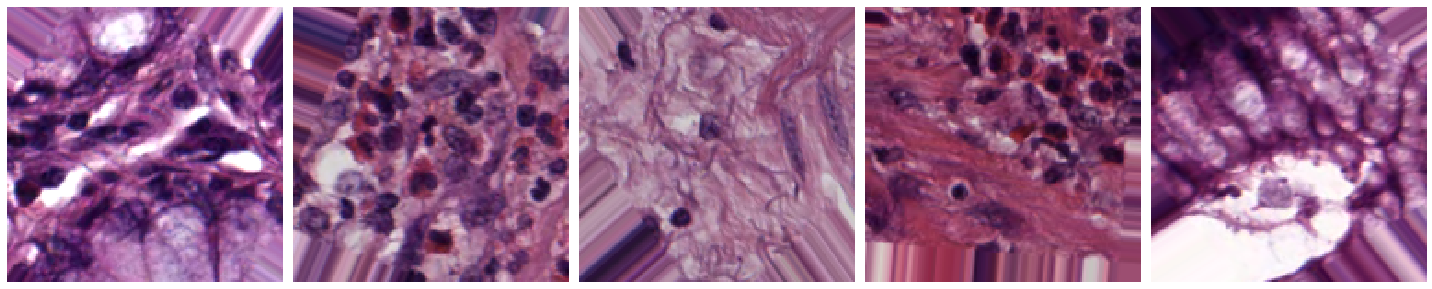

In [16]:
plotImages(sample_training_images[:5])

In [17]:
IMG_WIDTH

150

In [18]:
transfer_model = xception.Xception(include_top = False, weights = 'imagenet', input_shape = (IMG_HEIGHT, IMG_WIDTH, 3))

model = Sequential()
model.add(transfer_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(8, activation = 'softmax', name = 'predictions'))

83689472/83683744 [==============================] - 26s 0us/step


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
predictions (Dense)          (None, 8)                 1032      
Total params: 21,977,264
Trainable params: 21,922,736
Non-trainable params: 54,528
_______________________________________

In [20]:
total_train = len(train)
total_val = len(val)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)
checkpoint_callback = ModelCheckpoint('model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [24]:
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999),
              loss='binary_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size,
    callbacks=[early_stopping_callback, checkpoint_callback, tensorboard_callback]
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
 1/62 [..............................] - ETA: 0s - loss: 0.3879 - accuracy: 0.0312WARNING:tensorflow:From /opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
21/62 [=========>....................] - ETA: 5:56 - loss: 0.2255 - accuracy: 0.6436

KeyboardInterrupt: 

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
class_indices_dict = train_data_gen.class_indices
indices_class_dict = {v: k for k, v in class_indices_dict.items()}
indices_class_dict

{0: '01_TUMOR',
 1: '02_STROMA',
 2: '03_COMPLEX',
 3: '04_LYMPHO',
 4: '05_DEBRIS',
 5: '06_MUCOSA',
 6: '07_ADIPOSE',
 7: '08_EMPTY'}

In [ ]:
import glob

In [ ]:
test_images = glob.glob('/content/drive/My Drive/syde522/test/test/*.png')

In [ ]:
from skimage.io import imread

In [ ]:
y_pred = []
test_img_names = []
for pth in test_images:
    img = np.expand_dims(imread(pth), axis=0)
    y_pred.append(indices_class_dict[np.argmax(model.predict(img/255.))])
    test_img_names.append(pth.split('/')[-1])

In [ ]:
sample_submission_1 = pd.DataFrame(list(zip(test_img_names,y_pred)),columns=['Id','Category'])
sample_submission_1


,Id,Category
0,0206.png,04_LYMPHO
1,0128.png,06_MUCOSA
2,0089.png,03_COMPLEX
3,0161.png,06_MUCOSA
4,0070.png,02_STROMA
...,...,...
495,0030.png,07_ADIPOSE
496,0036.png,03_COMPLEX
497,0098.png,08_EMPTY
498,0157.png,08_EMPTY


In [ ]:
sample_submission_1.to_csv('/content/drive/My Drive/syde522/A02602_submission_6.csv', index=False)